detected barcode: Decoded(data=b'43770929851162', type='I25', rect=Rect(left=62, top=0, width=694, height=180), polygon=[Point(x=62, y=1), Point(x=62, y=179), Point(x=756, y=180), Point(x=756, y=0)])
Type: I25
Data: b'43770929851162'



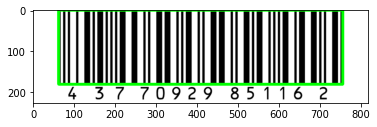

detected barcode: Decoded(data=b'Wikipedia', type='CODE128', rect=Rect(left=593, top=4, width=0, height=294), polygon=[Point(x=593, y=4), Point(x=593, y=298)])
Type: CODE128
Data: b'Wikipedia'



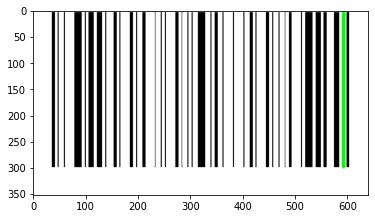

detected barcode: Decoded(data=b'0036000291452', type='EAN13', rect=Rect(left=124, top=58, width=965, height=812), polygon=[Point(x=124, y=59), Point(x=124, y=869), Point(x=621, y=870), Point(x=1089, y=870), Point(x=1089, y=58)])
Type: EAN13
Data: b'0036000291452'



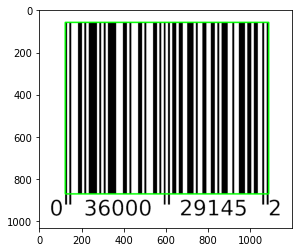

In [2]:
import cv2
from matplotlib import pyplot as plt
from pyzbar import pyzbar

def draw_barcode(decoded, image):
    # n_points = len(decoded.polygon)
    # for i in range(n_points):
    #     image = cv2.line(image, decoded.polygon[i], decoded.polygon[(i+1) % n_points], color=(0, 255, 0), thickness=5)
    # uncomment above and comment below if you want to draw a polygon and not a rectangle
    image = cv2.rectangle(image, (decoded.rect.left, decoded.rect.top), 
                            (decoded.rect.left + decoded.rect.width, decoded.rect.top + decoded.rect.height),
                            color=(0, 255, 0),
                            thickness=5)
    return image

def decode(image):
    # decodes all barcodes from an image
    decoded_objects = pyzbar.decode(image)
    for obj in decoded_objects:
        # draw the barcode
        print("detected barcode:", obj)
        image = draw_barcode(obj, image)
        # print barcode type & data
        print("Type:", obj.type)
        print("Data:", obj.data)
        print()

    return image


from glob import glob
barcodes = glob("barcode*.png")

for barcode_file in barcodes:
    # load the image to opencv
    img = cv2.imread(barcode_file)
    # decode detected barcodes & get the image
    # that is drawn
    img = decode(img)
    # show the image
    plt.imshow(img)
    plt.show()
